In [2]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download = drive.CreateFile({'id': '1KYOT4ZdKbclRa4AvYVX_CSSD9w589ScB'})
download.GetContentFile('train.zip')
!unzip 'train.zip'
train_df = pd.read_csv('train.csv')

train_df.head()

download = drive.CreateFile({'id': '15LNWI9UUcv25JwJNtGWjsbYsqzvY5xpX'})
download.GetContentFile('test.zip')
!unzip 'test.zip'
test_df = pd.read_csv('test.csv')

test_df.head()

Archive:  train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape[0], test_df.shape[0]

(116058, 35866)

In [4]:
train_df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [5]:
train_df['financial_institution'].nunique()

19

In [6]:
y_train = train_df['m13']
df = pd.concat([train_df, test_df], axis=0)
df.drop('m13', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
# Finding out missing data percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
unpaid_principal_bal,0,0.0
source,0,0.0
co-borrower_credit_score,0,0.0
debt_to_income_ratio,0,0.0
financial_institution,0,0.0
first_payment_date,0,0.0
insurance_percent,0,0.0
insurance_type,0,0.0
interest_rate,0,0.0
loan_id,0,0.0


In [8]:
df.dtypes

borrower_credit_score       float64
co-borrower_credit_score    float64
debt_to_income_ratio        float64
financial_institution        object
first_payment_date           object
insurance_percent           float64
insurance_type              float64
interest_rate               float64
loan_id                       int64
loan_purpose                 object
loan_term                     int64
loan_to_value                 int64
m1                            int64
m10                           int64
m11                           int64
m12                           int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
number_of_borrowers         float64
origination_date             object
source                       object
unpaid_principal_bal        

In [9]:
df.head()

,borrower_credit_score,co-borrower_credit_score,debt_to_income_ratio,financial_institution,first_payment_date,insurance_percent,insurance_type,interest_rate,loan_id,loan_purpose,loan_term,loan_to_value,m1,m10,m11,m12,m2,m3,m4,m5,m6,m7,m8,m9,number_of_borrowers,origination_date,source,unpaid_principal_bal
0,694.0,0.0,22.0,"Turner, Baldwin and Rhodes",05/2012,30.0,0.0,4.250,268055008619,C86,360,95,0,0,0,0,0,0,0,0,0,1,0,0,1.0,2012-03-01,Z,214000
1,697.0,0.0,44.0,"Swanson, Newton and Miller",03/2012,0.0,0.0,4.875,672831657627,B12,360,72,0,0,1,0,0,0,0,0,0,0,0,0,1.0,2012-01-01,Y,144000
2,780.0,0.0,33.0,Thornton-Davis,03/2012,0.0,0.0,3.250,742515242108,B12,180,49,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2012-01-01,Z,366000
3,633.0,638.0,44.0,OTHER,04/2012,0.0,0.0,4.750,601385667462,B12,360,46,0,1,1,1,0,0,0,0,0,0,0,1,2.0,2012-02-01,X,135000
4,681.0,0.0,43.0,OTHER,04/2012,0.0,0.0,4.750,273870029961,C86,360,80,0,9,10,11,1,2,3,4,5,6,7,8,1.0,2012-02-01,X,124000


In [0]:
df['first_payment_date'] = df['first_payment_date'].apply(lambda x: (x[:3]+'01/'+x[3:]))

In [0]:
import numpy as np
df['first_payment_date'] = pd.to_datetime(df['first_payment_date'])
df['origination_date'] = pd.to_datetime(df['origination_date'])
df['Age'] = (df['first_payment_date'] - df['origination_date']) /np.timedelta64(1,'M') 

In [12]:
df.head()

,borrower_credit_score,co-borrower_credit_score,debt_to_income_ratio,financial_institution,first_payment_date,insurance_percent,insurance_type,interest_rate,loan_id,loan_purpose,loan_term,loan_to_value,m1,m10,m11,m12,m2,m3,m4,m5,m6,m7,m8,m9,number_of_borrowers,origination_date,source,unpaid_principal_bal,Age
0,694.0,0.0,22.0,"Turner, Baldwin and Rhodes",2012-05-01,30.0,0.0,4.250,268055008619,C86,360,95,0,0,0,0,0,0,0,0,0,1,0,0,1.0,2012-03-01,Z,214000,2.004148
1,697.0,0.0,44.0,"Swanson, Newton and Miller",2012-03-01,0.0,0.0,4.875,672831657627,B12,360,72,0,0,1,0,0,0,0,0,0,0,0,0,1.0,2012-01-01,Y,144000,1.971293
2,780.0,0.0,33.0,Thornton-Davis,2012-03-01,0.0,0.0,3.250,742515242108,B12,180,49,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2012-01-01,Z,366000,1.971293
3,633.0,638.0,44.0,OTHER,2012-04-01,0.0,0.0,4.750,601385667462,B12,360,46,0,1,1,1,0,0,0,0,0,0,0,1,2.0,2012-02-01,X,135000,1.971293
4,681.0,0.0,43.0,OTHER,2012-04-01,0.0,0.0,4.750,273870029961,C86,360,80,0,9,10,11,1,2,3,4,5,6,7,8,1.0,2012-02-01,X,124000,1.971293


In [0]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder() 
df['financial_institution'] = lbl.fit_transform(df['financial_institution'])
df['source'] = lbl.fit_transform(df['source'])
df['loan_purpose'] = lbl.fit_transform(df['loan_purpose'])
df['last_12month_payments'] = df['m1'] + df['m2'] + df['m3'] + df['m3'] + df['m4'] + df['m5'] + df['m6'] + df['m7'] + df['m8'] + df['m9'] + df['m10'] + df['m11'] + df['m12']
df.drop('first_payment_date', axis=1, inplace=True)
df.drop('origination_date', axis=1, inplace=True)
df.drop('loan_id', axis=1, inplace=True)

In [14]:
train_df_proc = df[:116058]
test_df_proc = df[116058:]
print(train_df_proc.shape, test_df_proc.shape)

(116058, 27) (35866, 27)


In [15]:
cols_to_exclude = ["m13"]
cols_to_use = [col for col in df.columns if col not in cols_to_exclude]
train_X = train_df_proc[cols_to_use]
test_X = test_df_proc[cols_to_use]
train_y = train_df["m13"].values
print(train_X.shape, test_X.shape, train_y.shape)

(116058, 27) (35866, 27) (116058,)


In [0]:
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None, dep=8, seed=0, data_leaf=200):
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = dep
    params["num_leaves"] = 30
    params["min_data_in_leaf"] = data_leaf
    params["learning_rate"] = 0.01
    params["bagging_fraction"] = 0.8
    params["feature_fraction"] = 0.35
    params["feature_fraction_seed"] = seed
    params["bagging_freq"] = 1
    params["bagging_seed"] = seed
    params["lambda_l2"] = 5
    params["lambda_l1"] = 5
    params["verbosity"] = -1
    num_rounds = 20000

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=200, verbose_eval=500)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)
    #imps = model.feature_importance()
    #names = model.feature_name()
    #for fi, fn in enumerate(names):
    #    print(fn, imps[fi])

    loss = 0
    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        print(loss)
        return model, loss, pred_test_y, pred_test_y2
    else:
        return model, loss, pred_test_y, pred_test_y2

In [17]:
from sklearn import metrics, preprocessing, model_selection
import lightgbm as lgb

print("Building model..")
cv_scores = []
pred_test_full = 0
pred_train = np.zeros(train_X.shape[0])
n_splits = 3
kf = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=7988)
#gkf = model_selection.GroupKFold(n_splits=n_splits)
model_name = "lgb"
for dev_index, val_index in kf.split(train_X, train_df["m13"].values):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]

    pred_val = 0
    pred_test = 0
    n_models = 0.

    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=8, seed=2019)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=7, data_leaf=100, seed=9873)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=9, data_leaf=150, seed=4568)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    pred_val /= n_models
    pred_test /= n_models
    
    loss = metrics.roc_auc_score(val_y, pred_val)
        
    pred_train[val_index] = pred_val
    pred_test_full += pred_test / n_splits
    cv_scores.append(loss)
#     break
print(np.mean(cv_scores))

Building model..
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[85]	valid_0's auc: 0.87788
0.8778801550954888
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[239]	valid_0's auc: 0.876617
0.8766172747338352
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[28]	valid_0's auc: 0.877085
0.8770852021906943
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[41]	valid_0's auc: 0.908159
0.9081592778651719
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[144]	valid_0's auc: 0.906421
0.9064212074756761
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.906691
0.9066908823537829
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[141]	va

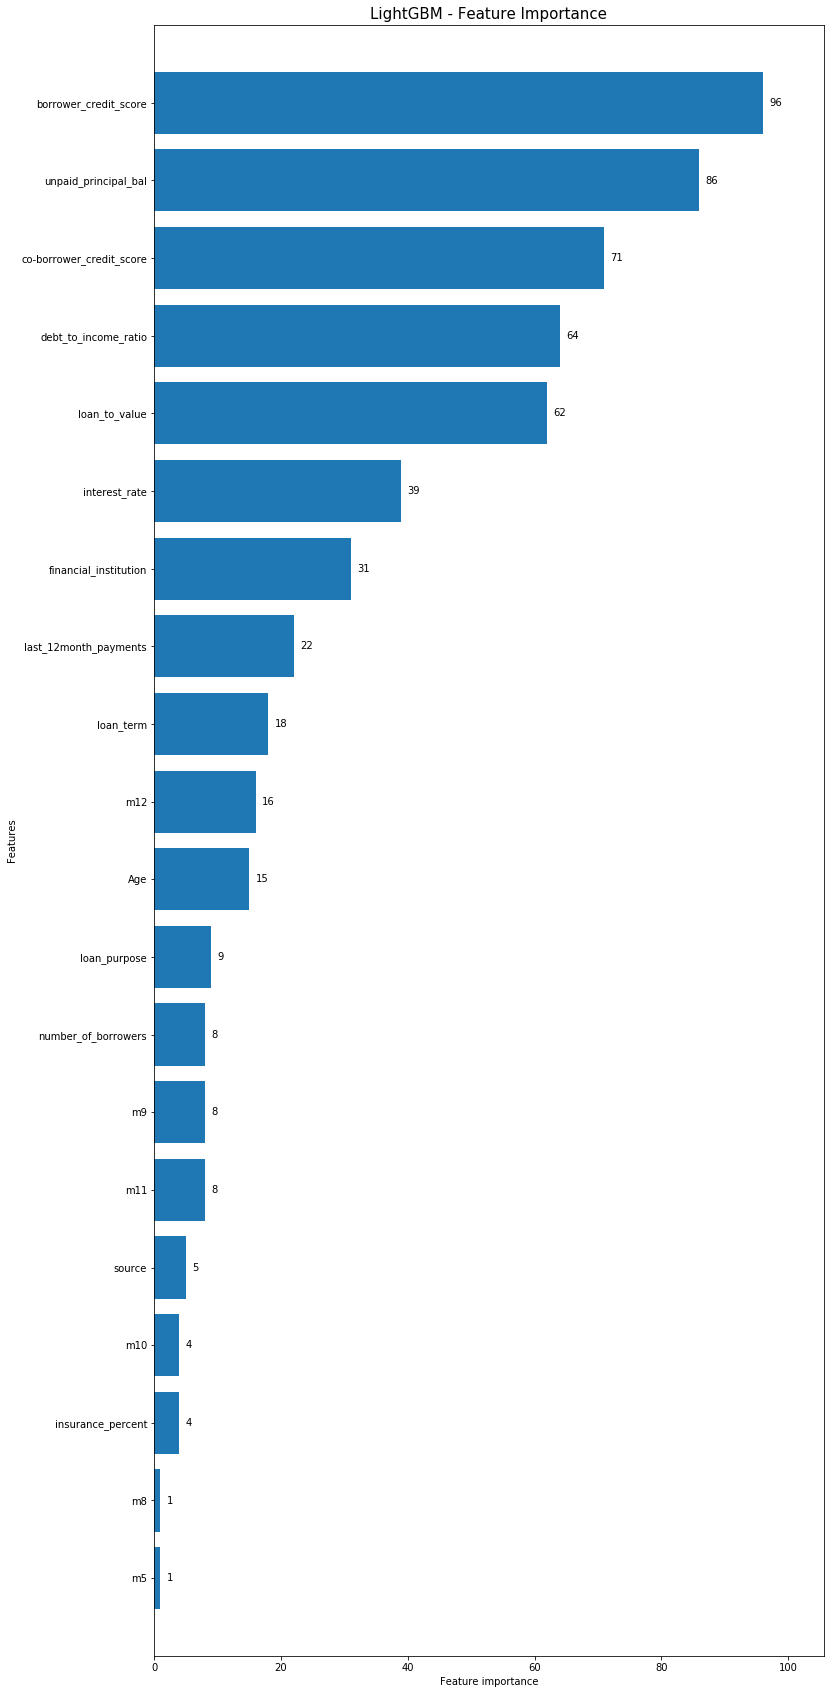

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,30))
lgb.plot_importance(model, max_num_features=100, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [0]:
sub_df = pd.DataFrame(test_df[["loan_id"]])
sub_df["m13"] = pred_test_full
sub_df.to_csv("submission.csv", index=False)

In [0]:
from google.colab import files
files.download('submission.csv')